In [1]:
# Unpickle the data
import pickle
with open('/content/sample_data/images.p', 'rb') as f:
  images = pickle.load(f)
with open('/content/sample_data/labels.p', 'rb') as f:
  labels = pickle.load(f)

In [2]:
print(images.shape)
print(labels.shape)

(270, 100, 100)
(270,)


In [3]:
labels

array(['Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamangal',
       'Bilwamangal', 'Bilwamangal', 'Bilwamangal', 'Bilwamang

In [4]:
set(labels)

{'Bilwamangal', 'Satya', 'Shibaditya'}

In [5]:
# LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
labels = le.fit_transform(labels)

In [6]:
set(labels)

{0, 1, 2}

In [7]:
le.inverse_transform([0, 1, 2])

array(['Bilwamangal', 'Satya', 'Shibaditya'], dtype='<U11')

In [8]:
import numpy as np

In [9]:
p = len(set(labels))
print('Number of Persons : ', p)

Number of Persons :  3


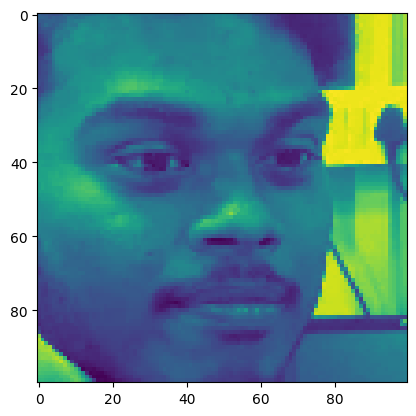

In [12]:
# Plotting
import matplotlib.pyplot as plt
plt.imshow(images[0])
plt.show()

In [13]:
import cv2

In [14]:
def preprocessing(img):
  img = cv2.equalizeHist(img)
  img = img.reshape(100, 100, 1)
  img = img/255
  return img

In [15]:
images = np.array(list(map(preprocessing, images)))
print('Shape of the input data : ', images.shape)

Shape of the input data :  (270, 100, 100, 1)


In [16]:
from keras.utils import to_categorical
labels = to_categorical(labels)

In [17]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.optimizers import Adam

In [19]:
def Lenet_model():
  model = Sequential()
  model.add(Conv2D(30, (5, 5), input_shape=(100, 100, 1), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  model.add(Conv2D(15, (3, 3), activation='relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))

  # Flatten Layer
  model.add(Flatten())
  # Hidden Layer
  model.add(Dense(100, activation='relu'))
  model.add(Dense(50, activation='relu'))

  # Output Layer
  model.add(Dense(p, activation='softmax'))
  model.compile(Adam(learning_rate = 0.01), loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [22]:
model = Lenet_model()
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 96, 96, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 46, 46, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 23, 23, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 7935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 100)                 │         793,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 3)                   │             153 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 803,648 (3.07 MB)

 Trainable params: 803,648 (3.07 MB)

 Non-trainable params: 0 (0.00 B)

In [23]:
h = model.fit(images, labels, epochs=10, validation_split = 0.1)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 364ms/step - accuracy: 0.3803 - loss: 3.1047 - val_accuracy: 1.0000 - val_loss: 1.0510
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 283ms/step - accuracy: 0.4547 - loss: 1.0327 - val_accuracy: 1.0000 - val_loss: 0.6186
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 285ms/step - accuracy: 0.9284 - loss: 0.4901 - val_accuracy: 1.0000 - val_loss: 8.5222e-04
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 281ms/step - accuracy: 0.9881 - loss: 0.0402 - val_accuracy: 1.0000 - val_loss: 0.0000e+00
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 279ms/step - accuracy: 0.9859 - loss: 0.0362 - val_accuracy: 1.0000 - val_loss: 0.1350
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 503ms/step - accuracy: 0.9991 - loss: 0.0083 - val_accuracy: 1.0000 - val_loss: 9.4752e-05
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 491ms/step - accuracy: 0.9986 - loss: 0.0019 - val_accuracy: 1.0000 - val_loss: 5.6825e-04
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 475ms/step - accuracy: 0.9955 - loss: 0.0155 - val_accuracy: 1.

In [24]:
 model.save('final_model.h5')
 print('Model saved successfully')

Model saved successfully
